<a href="https://colab.research.google.com/github/PondKann/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path = '/content/drive/My Drive/DataViz_2021'
os.listdir(path)

['pm-18-jan-2021.csv',
 'covid-19-daily_data_dictionary.xlsx',
 'income.csv',
 'income2.xls',
 'จัดซื้อ 57-58.xls',
 'online_retail_II.xlsx',
 'online_retail_II.csv',
 'dataClean.csv',
 'search_click.csv',
 'example_timestamp.csv',
 'example_timestamp_02.csv',
 'search_request.csv']

In [3]:
data = pd.read_csv(os.path.join(path,'search_request.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


### เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime (Timestamp)มันเหมือนกัน

In [ ]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar Chart (กราฟแท่ง)

#### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ web Wongnai.com เพื่อค้นหาร้านอาหารในแต่ละวัน
` ` `matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs) ` ` `

In [12]:
from matplotlib import pyplot as plt 
from datetime import datetime,time

ส่วนประกอบของกราฟแท่ง
- ตัวกราฟแท่ง (height)
- ตำแหน่งกราฟแท่ง (x)
- ชื่อแท่ง tick_label
- ชื่อกราฟ (plt.title)
- ชื่อแกน x (plt.xlabel)
- ชื่อแกน y (plt.ylabel)

การแสดงตัวอักษรภาษาไทยในกราฟ 
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31

In [11]:
import matplotlib as mpl 
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Text(0.5, 1.0, 'เทียบปริมาณคนเข้าใช้ Web Wongnai.com ในแต่ละวัน')

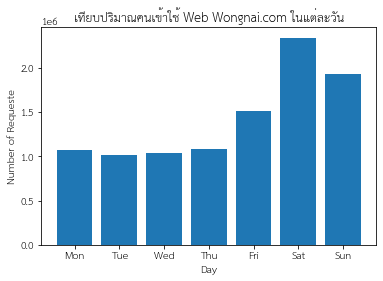

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek==0].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==1].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==2].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==3].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==4].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==5].shape[0],
                                data[data['search_timestamp'].dt.dayofweek==6].shape[0]
                                ],tick_label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun' ] )
plt.xlabel('Day')
plt.ylabel('Number of Requeste')
plt.title('เทียบปริมาณคนเข้าใช้ Web Wongnai.com ในแต่ละวัน')

วันจันทร์ และ ช่วงเวลาก่อนเที่ยง

In [ ]:
mon11 = data[(data['search_timestamp'].dt.dayofweek==0) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
tue11 = data[(data['search_timestamp'].dt.dayofweek==1) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
wed11 = data[(data['search_timestamp'].dt.dayofweek==2) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
thu11 = data[(data['search_timestamp'].dt.dayofweek==3) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
fri11 = data[(data['search_timestamp'].dt.dayofweek==4) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
sat11 = data[(data['search_timestamp'].dt.dayofweek==5) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]
son11 = data[(data['search_timestamp'].dt.dayofweek==6) & (data['search_timestamp'].dt.time < time(hour=12))  & (data['search_timestamp'].dt.time >= time(hour=11)) ].shape[0]

### Grouped bar chart

แสดงปริมาณคนเข้าใช้เว็ปในแต่ละวัน

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

In [ ]:
x

array([0, 1, 2, 3, 4, 5, 6])

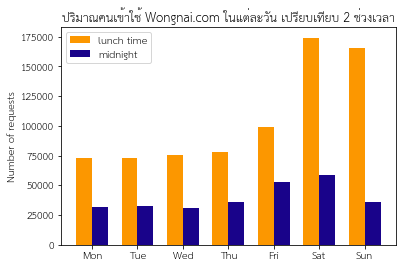

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

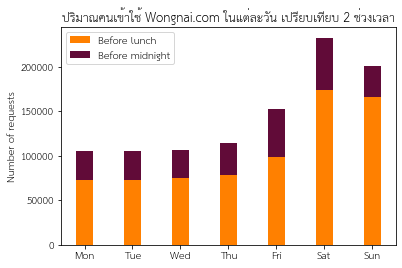

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='Before lunch',color = '#FF8000')
ax.bar(labels, b4midnight, width,bottom=b4lunch, label='Before midnight', color='#610B38')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

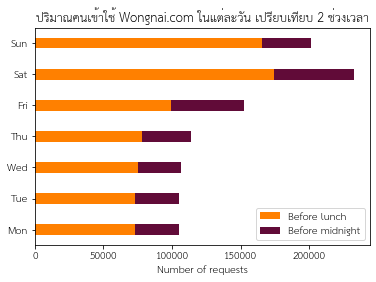

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='Before lunch',color = '#FF8000')
ax.barh(labels, b4midnight, width, left=b4lunch, label='Before midnight', color='#610B38')

ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

In [ ]:
labels2 = ['Before lunch','Before midnight']

In [ ]:
labels

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

### เช็คชื่อ โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

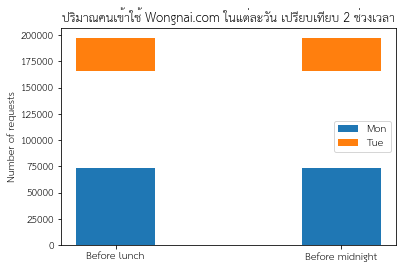

In [ ]:

fig, ax = plt.subplots()

ax.bar(labels2, b4lunch[0], width, label='Mon')
ax.bar(labels2, b4midnight[1], width, bottom=b4lunch, label='Tue')
ax.bar(labels2, b4midnight[2], width, bottom=b4lunch, label='Wed')
ax.bar(labels2, b4midnight[3], width, bottom=b4lunch, label='Thu')
ax.bar(labels2, b4midnight[4], width, bottom=b4lunch, label='Fri')
ax.bar(labels2, b4midnight[5], width, bottom=b4lunch, label='Sat')
ax.bar(labels2, b4midnight[6], width, bottom=b4lunch, label='Sun')


ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

## Histogram
นับความถี่ แล้วนำมา plot เป็นความสูง

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean=100 และ standev=15

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2021)
np.random.randint(100)

In [ ]:
np.random.randn(1000)   # จะสุ่มเลขมา โดยที่ mu = 1 
mu, sigma = 100, 15
x = mu+ sigma * np.random.randn(10000) 

In [ ]:
mu, sigma = 100, 15
x = mu+ sigma * np.random.randn(10000) 

In [ ]:
x #จุดของ data

array([ 90.20824855, 106.32897601,  97.39241564, ...,  63.97269435,
        75.66277002,  81.55453175])

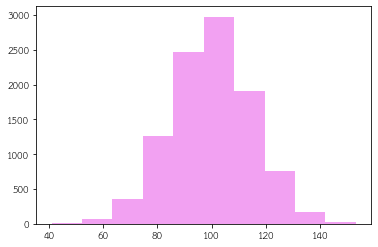

In [ ]:
output = plt.hist(x, 10, facecolor = 'violet', alpha = 0.75 );

In [ ]:
output

(array([  13.,   70.,  350., 1265., 2470., 2975., 1905.,  752.,  171.,
          29.]), array([ 40.88463603,  52.13062451,  63.376613  ,  74.62260148,
         85.86858997,  97.11457845, 108.36056694, 119.60655543,
        130.85254391, 142.0985324 , 153.34452088]), <a list of 10 Patch objects>)

In [26]:
data.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


## Plot Histogram ของ number_of_result

In [ ]:
A = list(data['number_of_result'].drop(1000016))

ตัวนี้เลขมันไม่เรียง มันอาจจะเป็น ตัวหนังสือรึป่าว

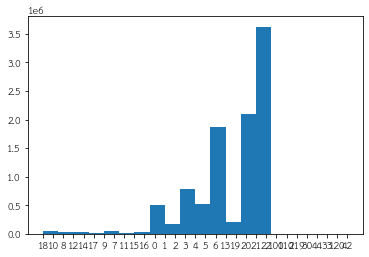

In [28]:
output2 = plt.hist(A, 20);

แก้ไขแกน x ที่เรียงข้อมูลผิด

In [29]:
data.dtypes

Unnamed: 0            int64
search_id            object
search_timestamp     object
user_agent           object
q                    object
user_id             float64
session_id           object
number_of_result     object
lat                  object
long                 object
dtype: object

เรียกดู data type ของตัวแปร

In [30]:
type(data['number_of_result'][0])

int

ตรวจสอบ data type ของตัวแปร

In [31]:
type(data['number_of_result'][0]) == int

True

วนลูป เพื่อตรวจสอบทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)} ')

ลบ record ที่มี ค่า ใน data 'number_of_result' เป็น number_of_result

In [32]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [ ]:
data = data.drop(1000016)

เปลี่ยน type ของข้อมูล

In [35]:
new_type = data['number_of_result'].astype('int32')

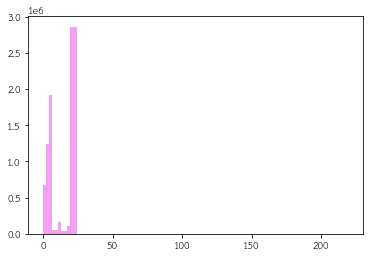

In [36]:
output3 = plt.hist(new_type, 100,  facecolor='violet', alpha=0.75); #ทำให้เลขในแนวแกน x เรียงได้

ลบ outlier

In [39]:
new_type_nooutlier = new_type[new_type < 25]

ขนาดของกราฟ

In [ ]:
mpl.rcParams['figure.figsize']=[10,10]

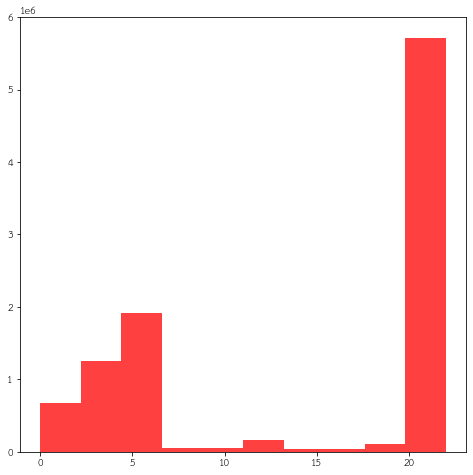

In [59]:
mpl.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier, 10,  facecolor='red', alpha=0.75); 

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุดกับแท่งอื่นๆรวมกัน

In [ ]:
mpl.rcParams['figure.figsize']=[8,8]
output2 = plt.hist(new_type_20, 10,  facecolor='red', alpha=0.75); 

In [64]:
new_type_20 = new_type_nooutlier[new_type_nooutlier ==20]
new_type_20.count()

2090596

In [65]:
new_type_no20 = new_type_nooutlier[new_type_nooutlier < 20]
new_type_no20.count()

4287104

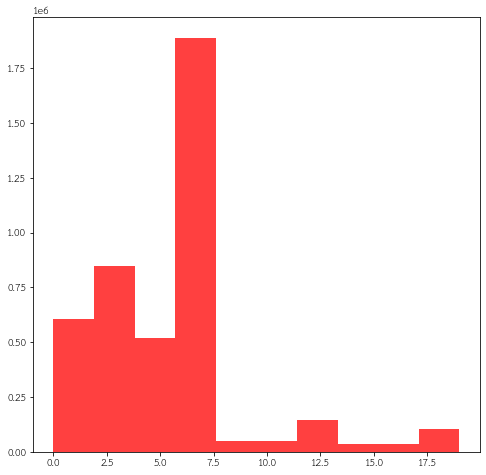

In [54]:
output2 = plt.hist(new_type_no20, 10,  facecolor='red', alpha=0.75); 

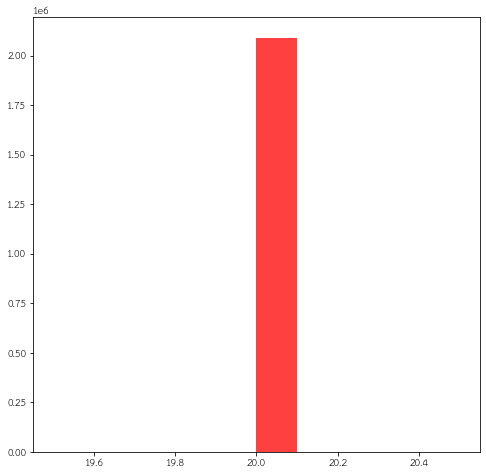

In [58]:
output3 = plt.hist(new_type_20, 10,  facecolor='red', alpha=0.75); 

เฉลย Quiz7

In [60]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

แท่งสุดท้าย

In [62]:
output[0][-1]

5717238.0

แท่งแรก ถึง ก่อนแท่งสุดท้าย

In [63]:
sum(output[0][:-1])

4287104.0

# Tree Map

In [68]:
!pip install squarify

In [69]:
import squarify 

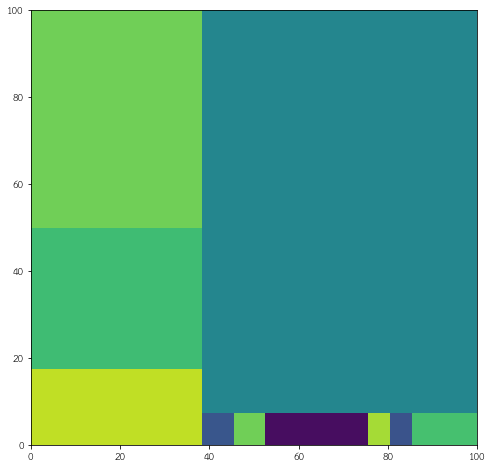

In [81]:
output4 = squarify.plot(output[0])

ใส่ตัวเลข

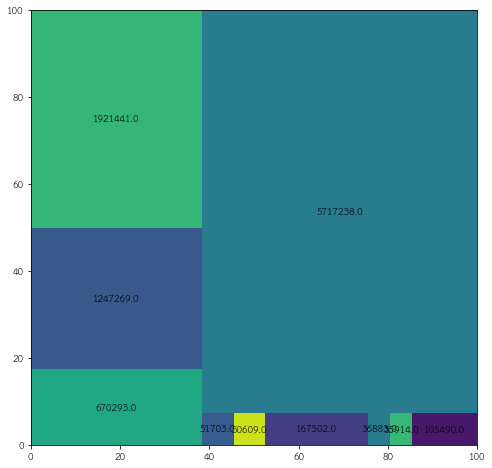

In [83]:
squarify.plot(output[0], value=output[0])

ลดแกน y ให้สั้นลง

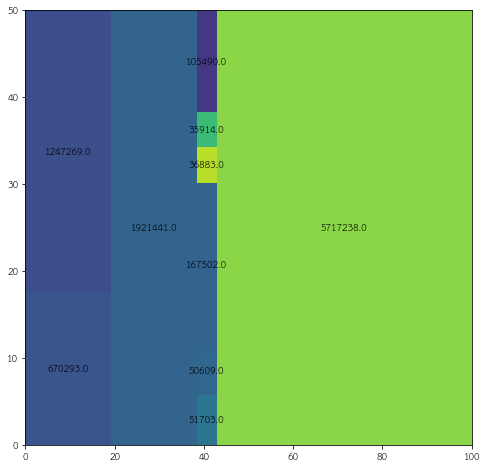

In [91]:
squarify.plot(output[0], value=output[0], norm_y=50)

#Radar chart


In [100]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [92]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
        'cheese' : [2,5,4,3],
        'beer' : [2,1,3,5],
        'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
        'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


อยากได้ชื่อ columns

In [98]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

- len(categories) ความยาว -> 012345
- 

In [101]:
values = df.mean().values.flatten().tolist()  #

values += values[:1] # repeat the first value to close the circular graph

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]

angles += angles[:1]

In [102]:
values

[3.5, 2.75, 3.75, 2.5, 3.25, 3.5]

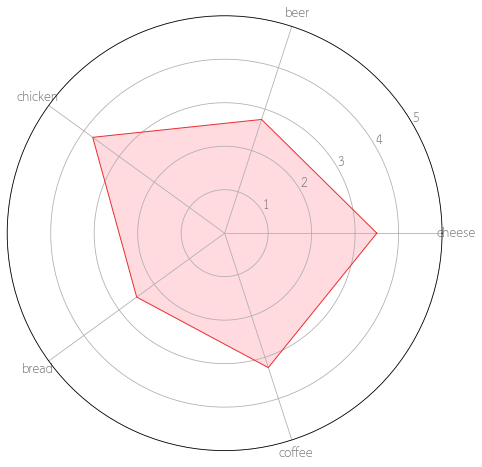

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

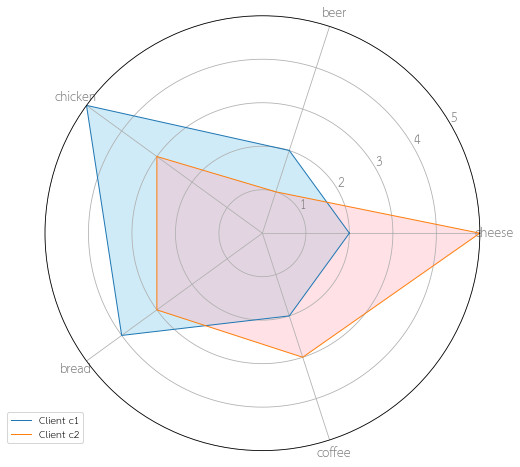

In [104]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)
 
# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))